# Modelos

Modelo con corpus grande

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

from funciones_auxiliares import embeber_datos2, cargar_corpus, cargar_modelo, sigmoide_np

corpus, vocab, vocab_size, word_to_idx, idx_to_word = cargar_corpus("corpus.txt", "corpus")
W1, W2, N, C, eta = cargar_modelo("pesos_cbow_pcshavak-c_epoca1600.npz", "relevant_weights") # MEJOR HASTA EL MOMENTO
x_train, y_train = embeber_datos2(corpus, W1, word_to_idx, 10)

# "Escalar" los datos del modelo
x_train = sigmoide_np(x_train)
y_train = sigmoide_np(y_train)

# Datos de entrenamiento
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

input_size = x_train.shape[1]
output_size = y_train.shape[1]

# Definición del modelo
model = Sequential()
model.add(Dense(512, input_shape=(input_size,), activation='gelu'))
model.add(Dense(256, activation='gelu'))
model.add(Dense(128, activation='gelu'))
model.add(Dense(output_size, activation='sigmoid'))

# Compilación
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mse',
              metrics=['mae'])

Tamaño de corpus: 310347
Tamaño de vocabulario: 27971
Total de pares válidos: 310186
Contextos únicos: 309015
x_train shape: (310186, 1000)
y_train shape: (310186, 100)


Modelo con corpus pequeño

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

from funciones_auxiliares import embeber_datos2, cargar_corpus, cargar_modelo, sigmoide_np

corpus, vocab, vocab_size, word_to_idx, idx_to_word = cargar_corpus("mini_corpus.txt")
W1, W2, N, C, eta = cargar_modelo("pesos_cbow_pcshavak-mini_epoca999.npz", "weights")
x_train, y_train = embeber_datos2(corpus, W1, word_to_idx, 10)

# "Escalar" los datos del modelo
x_train = sigmoide_np(x_train)
y_train = sigmoide_np(y_train)

# Datos de entrenamiento
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

input_size = x_train.shape[1]
output_size = y_train.shape[1]

# Definición del modelo
model = Sequential()
model.add(Dense(256, input_shape=(input_size,), activation='gelu'))
model.add(Dense(128, activation='gelu'))
model.add(Dense(output_size, activation='sigmoid'))

# Compilación
model.compile(optimizer=Adam(learning_rate=0.001), # 0.0001
              loss='mse',
              metrics=['mae'])

Tamaño de corpus: 57057
Tamaño de vocabulario: 10607
Total de pares válidos: 57033
Contextos únicos: 57010
x_train shape: (57033, 500)
y_train shape: (57033, 50)


# Entrenamiento

Epoch 1/20
3565/3565 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.1493 - mae: 0.3528
Epoch 2/20
3565/3565 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.1486 - mae: 0.3518
Epoch 3/20
3565/3565 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1482 - mae: 0.3510
Epoch 4/20
3565/3565 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1478 - mae: 0.3504
Epoch 5/20
3565/3565 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.1475 - mae: 0.3498
Epoch 6/20
3565/3565 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1472 - mae: 0.3493
Epoch 7/20
3565/3565 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1469 - mae: 0.3487
Epoch 8/20
3565/3565 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.1466 - mae: 0.3482
Epoch 9/20
3565/3565 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1463 - mae: 0.3476
Epoch 10/20
3565/3565 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1460 - mae: 0.3472
Epoch 11/20
3565/3565 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.1458 - mae: 0.3467
Epoch 12/20
3565/3565 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.1455 - m

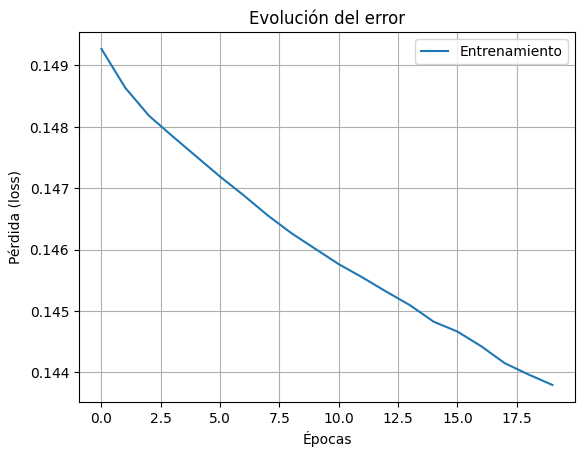

In [16]:
# Entrenamiento
historia = model.fit(x_train, y_train, batch_size=16, epochs=20)

# Gráfico de la pérdida
plt.plot(historia.history['loss'], label='Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (loss)')
plt.title('Evolución del error')
plt.legend()
plt.grid()
plt.show()

# Guardar el modelo entrenado
model.save("modelo_pmc.keras")

In [ ]:
from keras.models import load_model

model = load_model("PMC/modelo_pmc.keras")

# Pruebas

In [ ]:
import numpy as np

def evaluar_modelo(model, x, y):
    """
    Calcula el error de un modelo Keras en los datos x, y.
    Devuelve MSE y MAE promedio.
    """
    y_pred = model.predict(x, batch_size=32, verbose=0)
    mse = np.mean((y - y_pred) ** 2)
    mae = np.mean(np.abs(y - y_pred))
    return mse, mae

mse_train, mae_train = evaluar_modelo(model, x_train, y_train)
print(f"Error en x_train: MSE={mse_train:.6f}, MAE={mae_train:.6f}")